# The asynchronous & irregular state of cortical circuits

Investigation of the asynchronous and irregular dynamical regime of cortical circuits in a simple model network.

## Generating Poisson spike trains

We generate the spike trains by looping over each neuron i and each time bin k, and sampling a value from a Bernoulli distribution with probability r_X * delta_t as given in the hint. If the sampled value is 1, we set spike_trains[i, k] to 1/delta_t to indicate that the neuron fired a spike at that time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

<Figure size 432x288 with 0 Axes>

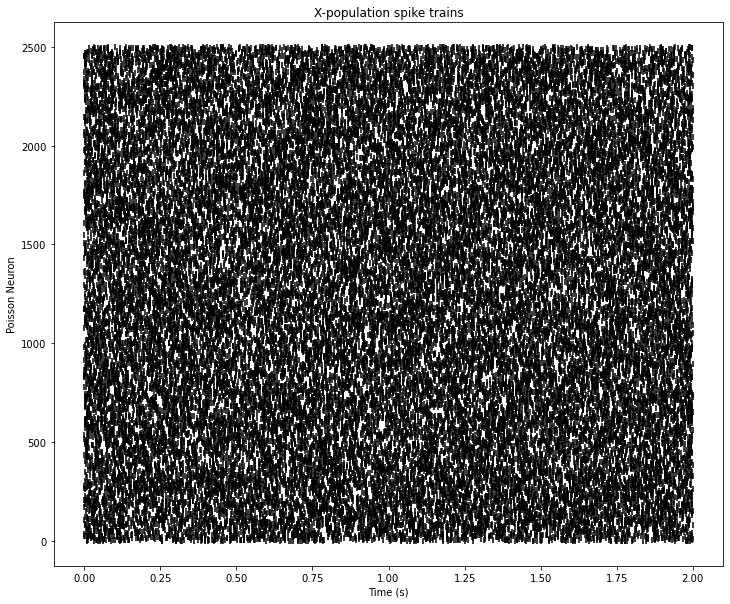

<Figure size 432x288 with 0 Axes>

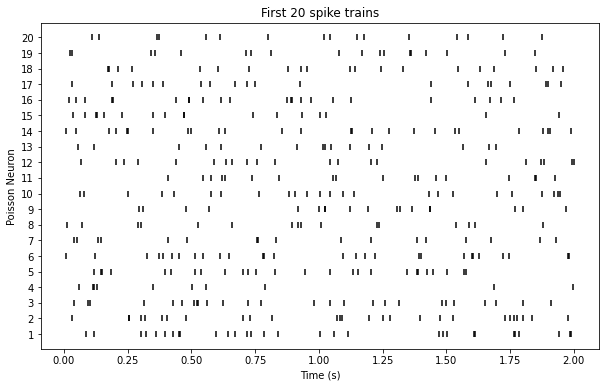

In [22]:

# Set parameters
N = 2500 # number of neurons
T = 2.0 # total time in seconds
delta_t = 0.0001 # time step in seconds (0.1 ms)
r_X = 10 # firing rate of the Poisson neurons in population X

# Generate spike trains
num_bins = int(T / delta_t)

# initialising spike trains 
# Here the rows represents the neurons and the columns the timesteps
spike_trains = np.zeros((N, num_bins))

spike_trains = np.random.binomial(n=1, p=r_X*delta_t, size=(N, num_bins))/delta_t


# Create raster plot
plt.figure(1)
fig, ax = plt.subplots(figsize=(12, 10))
for i in range(N):
    spikes = np.nonzero(spike_trains[i])[0] * delta_t
    y = np.ones_like(spikes) * i
    ax.scatter(spikes, y, marker='|', color='k')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Poisson Neuron')
plt.title("X-population spike trains")
plt.savefig("ex1-1.png")
plt.show()


plt.figure(2)
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(1, 21):
    spikes = np.nonzero(spike_trains[i])[0] * delta_t
    y = np.ones_like(spikes) * i
    ax.scatter(spikes, y, marker='|', color='k')
ax.set_xlabel('Time (s)')
ax.set_yticks(list(range(1, 21)))
ax.set_ylabel('Poisson Neuron')
plt.title("First 20 spike trains")
plt.savefig("ex1-2.png")
plt.show()


In this code, we use NumPy's np.random.binomial() function to generate a matrix of size (N, num_bins) where each element is a random draw from a binomial distribution with parameters n=1 (since we are interested in whether a spike occurred or not) and p=r_X * delta_t as given in the hint.

We then create a raster plot as before by using plt.scatter() to plot a vertical line at the time of each spike for each neuron. We first use NumPy's np.nonzero() function to find the indices of the nonzero elements in each row of spike_trains, and multiply these indices by delta_t to get the time of each spike. We then plot the spikes for each neuron as before.

In [23]:
def avgSpikesPerNeuron(matrix):
    return np.mean(spike_trains.sum(axis=1))
avgSpikesPerNeuron(spike_trains)

20.1044

## Single LIF neuron with one input spike train

We simulate the membrane potential dynamics and spiking activity of a single LIF neuron, which receives input from a single Poisson neuron with rate r_X.

In [164]:
def evaluateMembraneP_s(m_Ps, t, delta_t, tau, w, input_spikes):
    m_p = m_Ps[t-1] + delta_t*( -(m_Ps[t-1]/tau) + w*input_spikes[t-1] )
    return m_p

In [168]:
# Set parameters
T = 2.0 # total time in seconds
delta_t = 0.0001 # time step in seconds (0.1 ms)
r_X = 10 # firing rate of the Poisson neuron
w = 0.9 # single weight
tau = 0.02 # membrane time constant (20 ms)
num_bins = int(T / delta_t) # number of bins in spike train
V_t = 1 # spiking threshold

# generate the input spike train
in_spike_train = np.random.binomial(n=1, p=r_X*delta_t, size=(num_bins))/delta_t

out_spike_train = np.zeros(num_bins)
m_Ps = np.zeros(num_bins)


for t in range(1, num_bins):
    m_Ps[t] = evaluateMembraneP_s(m_Ps, t, delta_t, tau, w, in_spike_train)
    if m_Ps[t] > V_t:
        out_spike_train[t] = 1/delta_t
        m_Ps[t] = 0
        

<Figure size 432x288 with 0 Axes>

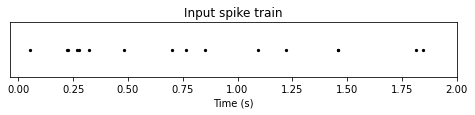

<Figure size 432x288 with 0 Axes>

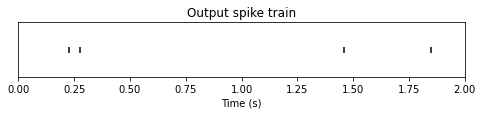

<Figure size 432x288 with 0 Axes>

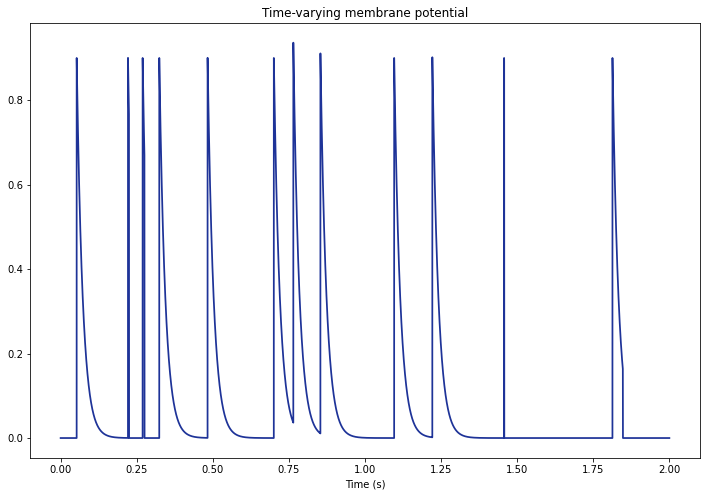

In [169]:
# Create raster plot for input and output spike trains
plt.figure(1)
fig, ax = plt.subplots(figsize=(8, 1))
times= np.arange(0,num_bins*delta_t,delta_t)

spikes = np.nonzero(in_spike_train)[0] * delta_t
y = np.ones_like(spikes) 
ax.scatter(spikes, y, s=5, color='k')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = True, bottom = True)
ax.set_xticks(np.linspace(0,2, 9))
plt.title("Input spike train")
ax.set_xlabel('Time (s)')
plt.savefig("ex2-1.png", bbox_inches = "tight")
plt.show()


plt.figure(2)
fig, ax = plt.subplots(figsize=(8, 1))

spikes = np.nonzero(out_spike_train)[0] * delta_t
y = np.ones_like(spikes) 
ax.scatter(spikes, y, marker='|', color='k')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = True, bottom = True)
plt.title("Output spike train")
ax.set_xticks(np.linspace(0,2, 9))
ax.set_xlabel('Time (s)')
plt.savefig("ex2-2.png", bbox_inches = "tight")
plt.show()

plt.figure(3)
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(times, m_Ps, linewidth=1.75, color = '#1E3398')
plt.title("Time-varying membrane potential")

ax.set_xlabel('Time (s)')
plt.savefig("ex2-3.png", bbox_inches = "tight")
plt.show()

## Single LIF neuron with many input spike trains

We consider now a single LIF neuron receiving inputs from K independent Poisson neurons.

In [2]:
def evaluateMembraneP_m(m_Ps, t, delta_t, tau, w, K, input_spikes):
    m_p = m_Ps[t-1] + delta_t*( -(m_Ps[t-1]/tau) + (w/K)*input_spikes.sum(axis=0)[t-1])
    return m_p

In [72]:
# Set parameters
T = 2.0 # total time in seconds
K = 100 # independent Poisson neurons
delta_t = 0.0001 # time step in seconds (0.1 ms)
r_X = 10 # firing rate of the Poisson neuron
w = 1 # single weight
tau = 0.02 # membrane time constant (20 ms)
num_bins = int(T / delta_t) # number of bins in spike train
V_t = 1 # spiking threshold

# generate K input spike trains
in_spike_train = np.random.binomial(n=1, p=r_X*delta_t, size=(K, num_bins))/delta_t

out_spike_train = np.zeros(num_bins)
m_Ps = np.zeros(num_bins)


for t in range(1, num_bins):
    m_Ps[t] = evaluateMembraneP_m(m_Ps, t, delta_t, tau, w, K, in_spike_train)
    if m_Ps[t] > V_t:
        out_spike_train[t] = 1/delta_t


<Figure size 432x288 with 0 Axes>

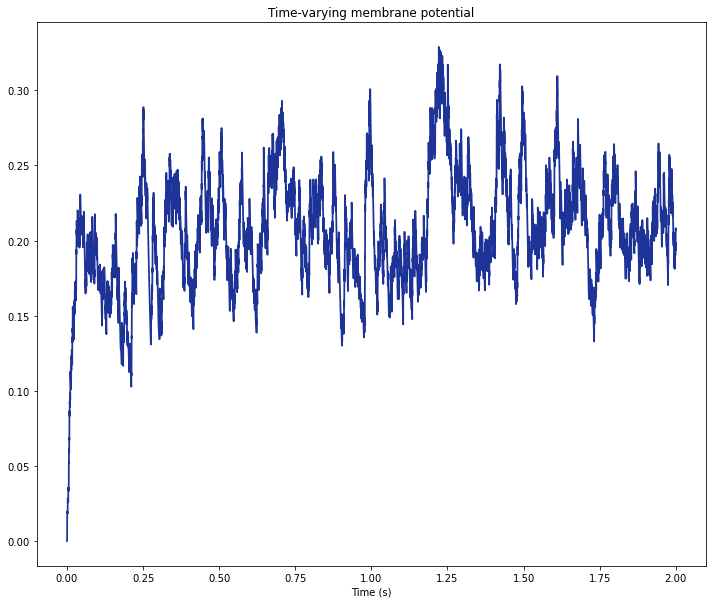

<Figure size 432x288 with 0 Axes>

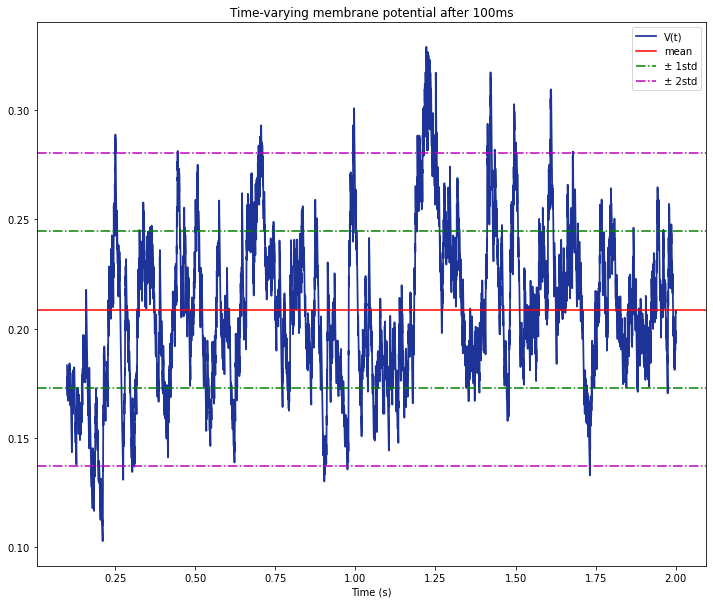

In [79]:
# FIX AXES LABELS
# add legend

times= np.arange(0,num_bins*delta_t,delta_t)

plt.figure(1)
fig, ax = plt.subplots(figsize=(12, 10))

plt.plot(times, m_Ps, linewidth=1.75, color = '#1E3398')
plt.title("Time-varying membrane potential")
ax.set_xlabel('Time (s)')
plt.savefig("ex3-1.png", bbox_inches = "tight")
plt.show()

mean = np.mean(m_Ps[1000:])
std = np.std(m_Ps[1000:])

plt.figure(2)
fig, ax = plt.subplots(figsize=(12, 10))

plt.plot(times[1000:], m_Ps[1000:], linewidth=1.75, color = '#1E3398', label="V(t)")
plt.axhline(y = mean, color = 'r', linestyle = '-', label= "mean")
plt.axhline(y = mean+std, color = 'g', linestyle = '-.', label="± 1std")
plt.axhline(y = mean-std, color = 'g', linestyle = '-.', label='_nolegend_')
plt.axhline(y = mean+2*std, color = 'm', linestyle = '-.', label="± 2std")
plt.axhline(y = mean-2*std, color = 'm', linestyle = '-.', label='_nolegend_')
plt.title("Time-varying membrane potential after 100ms")
plt.legend()
ax.set_xlabel('Time (s)')
plt.savefig("ex3-2.png", bbox_inches = "tight")
plt.show()

After about 100 ms, the fluctuations of Vi(t) become stationary, and approximately normally distributed. We evaluate mean and variance of this distribution and plot them as a function of K.

In [9]:
def evaluateMean(w, r_X, tau):
    return w * r_X * tau

def evaluateVariance(w, r_X, tau, K):
    return ((w*w) * r_X * tau)/(2.*K)

<Figure size 432x288 with 0 Axes>

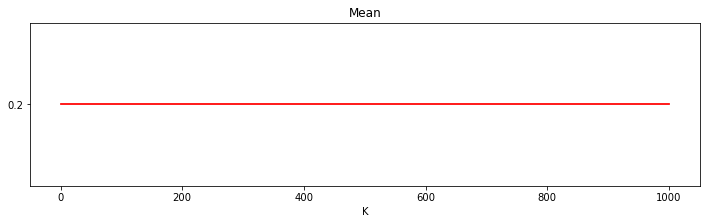

/var/folders/47/7414tgbs2kz1x5ql498d6hth0000gn/T/ipykernel_43212/3675921387.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return ((w*w) * r_X * tau)/(2.*K)


<Figure size 432x288 with 0 Axes>

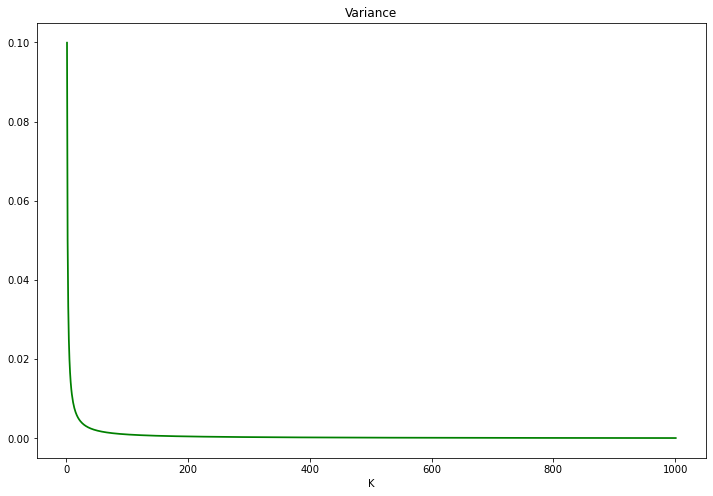

In [33]:
# fix axes


# Set parameters
T = 2.0 # total time in seconds
#K = 100 # independent Poisson neurons
delta_t = 0.0001 # time step in seconds (0.1 ms)
r_X = 10 # firing rate of the Poisson neuron
w = 1 # single weight
tau = 0.02 # membrane time constant (20 ms)
num_bins = int(T / delta_t) # number of bins in spike train
V_t = 1 # spiking threshold

K = np.linspace(0,1001, 1001)

plt.figure(1)
fig, ax = plt.subplots(figsize=(12, 3))

m = np.ones(1001) * evaluateMean(w, r_X, tau)

plt.plot(K, m, color = 'r',  linewidth =1.75)
plt.title("Mean")
plt.yticks([0.2])
ax.set_xlabel('K')
plt.show()

plt.figure(2)
fig, ax = plt.subplots(figsize=(12, 8))

v =  evaluateVariance(w, r_X, tau, K)

plt.plot(K, v, color='g', linewidth =1.75)
plt.title("Variance")
ax.set_xlabel('K')
plt.show()

In [21]:
def simulateSingleLIF(T, r_X, delta_t, tau, w, K, V_t):
    
    num_bins = int(T / delta_t)
    in_spike_train = np.random.binomial(n=1, p=r_X*delta_t, size=(K,num_bins))/delta_t
    out_spike_train = np.zeros(num_bins)
    m_Ps = np.zeros(num_bins)

    for t in range(1, num_bins):
        m_Ps[t] = evaluateMembraneP_m(m_Ps, t, delta_t, tau, w, K, in_spike_train)
        if m_Ps[t] > V_t:
            out_spike_train[t] = 1/delta_t
            
    # evaluating mean and std discrding the first 100 ms
    mean = np.mean(m_Ps[1000:])
    std = np.std(m_Ps[1000:])
    return mean, std, out_spike_train, m_Ps

In [4]:
# Set parameters
T = 10.0 # total time in seconds
delta_t = 0.0001 # time step in seconds (0.1 ms)
r_X = 10 # firing rate of the Poisson neuron
w = 1 # single weight
tau = 0.02 # membrane time constant (20 ms)
V_t = 1 # spiking threshold

In [9]:
# simulation with 1 independent Poisson neurons
mean_1, std_1, _, _ = simulateSingleLIF(T, r_X, delta_t, tau, w, 1, V_t)

In [10]:
# simulation with 10 independent Poisson neurons
mean_10, std_10, _, _ = simulateSingleLIF(T, r_X, delta_t, tau, w, 10, V_t)

In [11]:
# simulation with 100 independent Poisson neurons
mean_100, std_100, _, _ = simulateSingleLIF(T, r_X, delta_t, tau, w, 100, V_t)

In [12]:
# simulation with 1000 independent Poisson neurons
mean_1000, std_1000, _, _ = simulateSingleLIF(T, r_X, delta_t, tau, w, 1000, V_t)

In [15]:
print("For K=1, the mean is ", mean_1, " and the variance", std_1*std_1)
print("For K=10, the mean is ", mean_10, " and the variance", std_10*std_10)
print("For K=100, the mean is ", mean_100, " and the variance", std_100*std_100)
print("For K=1000, the mean is ", mean_1000, " and the variance", std_1000*std_1000)

For K=1, the mean is  0.22072443766581776  and the variance 0.10565531995019785
For K=10, the mean is  0.20138662950731104  and the variance 0.010408343839349169
For K=100, the mean is  0.19973472471762083  and the variance 0.0009760333744173723
For K=1000, the mean is  0.19940341350818166  and the variance 8.885430695309081e-05


/var/folders/47/7414tgbs2kz1x5ql498d6hth0000gn/T/ipykernel_90295/3675921387.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return ((w*w) * r_X * tau)/(2.*K)


<Figure size 432x288 with 0 Axes>

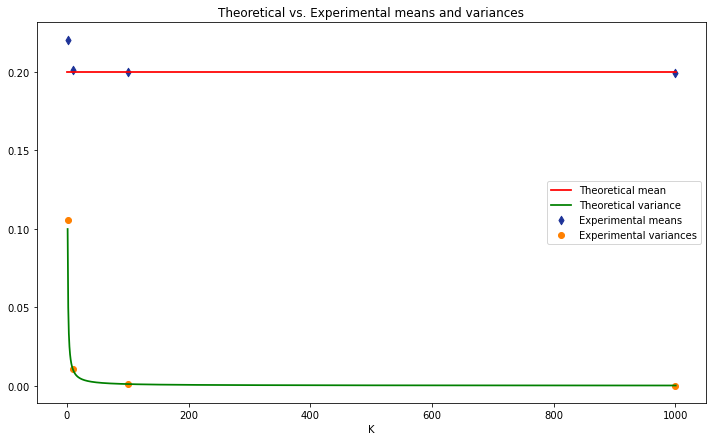

/var/folders/47/7414tgbs2kz1x5ql498d6hth0000gn/T/ipykernel_90295/2216788376.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar([1, 10, 100, 1000],[mean_1, mean_10, mean_100, mean_1000],  yerr = [std_1, std_10, std_100, std_1000],linewidth =1, label='Experimental means', color = "#1E3398", fmt="o", marker ='d')


<Figure size 432x288 with 0 Axes>

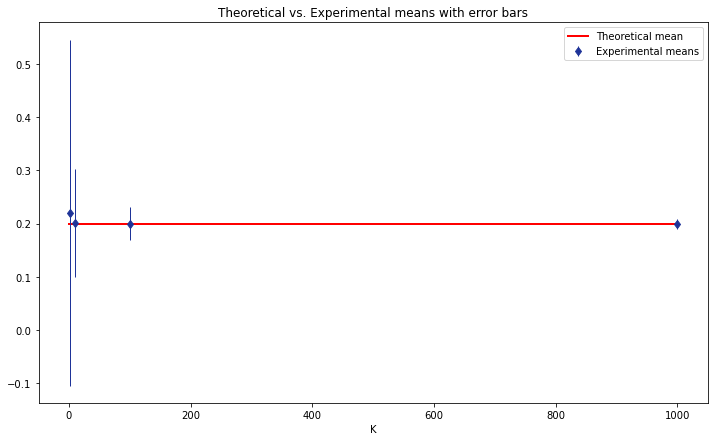

In [20]:
# MEAN
K = np.linspace(0,1001, 1001)
m = np.ones(1001) * evaluateMean(w, r_X, tau)
v =  evaluateVariance(w, r_X, tau, K)

plt.figure(1)
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(K, m, color = 'r', linewidth =1.75, label="Theoretical mean")
plt.plot(K, v, color='g', linewidth =1.75, label="Theoretical variance")

mean= ax.scatter([1, 10, 100, 1000],[mean_1, mean_10, mean_100, mean_1000], label='Experimental means', color = "#1E3398",marker ='d' )
var= ax.scatter([1, 10, 100, 1000],[std_1*std_1, std_10*std_10, std_100*std_100, std_1000*std_1000], color="#FF8000", label='Experimental variances')


plt.title("Theoretical vs. Experimental means and variances")
plt.legend()
#plt.yticks([0.2])
ax.set_xlabel('K')
plt.savefig("ex4-1.png", bbox_inches = "tight")
plt.show()


plt.figure(2)
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(K, m, color = 'r', linewidth =2, label="Theoretical mean")
plt.errorbar([1, 10, 100, 1000],[mean_1, mean_10, mean_100, mean_1000],  yerr = [std_1, std_10, std_100, std_1000],linewidth =1, label='Experimental means', color = "#1E3398", fmt="o", marker ='d')
plt.title("Theoretical vs. Experimental means with error bars")
plt.legend()
#plt.yticks([0.2])
ax.set_xlabel('K')
plt.savefig("ex4-err.png", bbox_inches = "tight")
plt.show()

We evaluate the value of w such that the mean of this distribtion is equal to the threshold potential

In [23]:

delta_t = 0.0001 # time step in seconds (0.1 ms)
r_X = 10 # firing rate of the Poisson neuron
w = 5 # single weight
tau = 0.02 # membrane time constant (20 ms)
V_t = 1 # spiking threshold
K = 100

# simulation
mean_2s, std_2s, out_spike_train2s, m_P2s = simulateSingleLIF(2, r_X, delta_t, tau, w, K, V_t)
mean_5s, std_5s, out_spike_train5s, m_P5s = simulateSingleLIF(5, r_X, delta_t, tau, w, K, V_t)
#mean_10s, std_10s, out_spike_train, m_P = simulateSingleLIF(10, r_X, delta_t, tau, w, K, V_t)

<Figure size 432x288 with 0 Axes>

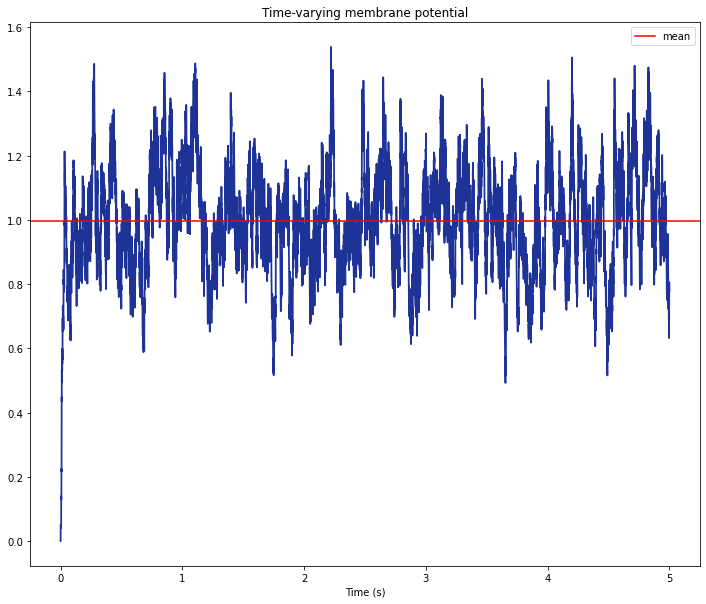

<Figure size 432x288 with 0 Axes>

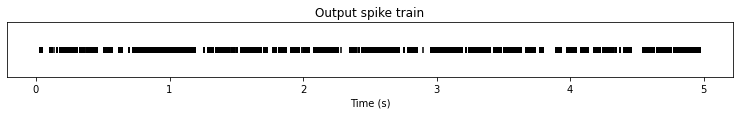

In [35]:
num_bins = int(5 / delta_t)
times= np.arange(0,num_bins*delta_t,delta_t)
mean = np.mean(m_P5s[1000:])

plt.figure(1)
fig, ax = plt.subplots(figsize=(12, 10))

plt.plot(times, m_P5s, linewidth=1.75, color = '#1E3398')
plt.axhline(y = mean, color = 'r', linestyle = '-', label= "mean")
plt.title("Time-varying membrane potential")
ax.set_xlabel('Time (s)')
plt.legend()
plt.savefig("ex4-mp-4.png", bbox_inches = "tight")
plt.show()


plt.figure(2)
fig, ax = plt.subplots(figsize=(13, 1))

spikes = np.nonzero(out_spike_train5s)[0] * delta_t
y = np.ones_like(spikes) 
ax.scatter(spikes, y, marker='|', color='k')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = True, bottom = True)
plt.title("Output spike train")
ax.set_xticks(np.linspace(0,5, 6))
ax.set_xlabel('Time (s)')
plt.savefig("ex4-os-4.png", bbox_inches = "tight")
plt.show()

We finally evaluate the Fano factor for different simulation time intervals: 2s 5s and 10s

In [146]:
# Set parameters
T = 2.0 # total time in seconds
K = 100 # independent Poisson neurons
delta_t = 0.0001 # time step in seconds (0.1 ms)
r_X = 10 # firing rate of the Poisson neuron

tau = 0.02 # membrane time constant (20 ms)
num_bins = int(T / delta_t) # number of bins in spike train
V_t = 1 # spiking threshold

# generate K input spike trains
in_spike_train = np.random.binomial(n=1, p=r_X*delta_t, size=(K, num_bins))/delta_t



In [ ]:
out_spike_train = np.zeros(num_bins)
m_Ps = np.zeros(num_bins)
w = 4.4
8# single weight
for t in range(1, num_bins):
    m_Ps[t] = evaluateMembraneP_m(m_Ps, t, delta_t, tau, w, K, in_spike_train)
    if m_Ps[t] > V_t:
        out_spike_train[t] = 1/delta_t
        m_Ps[t] = 0
        
print('Output Firing Rate: ', np.count_nonzero(out_spike_train)/T)

<Figure size 432x288 with 0 Axes>

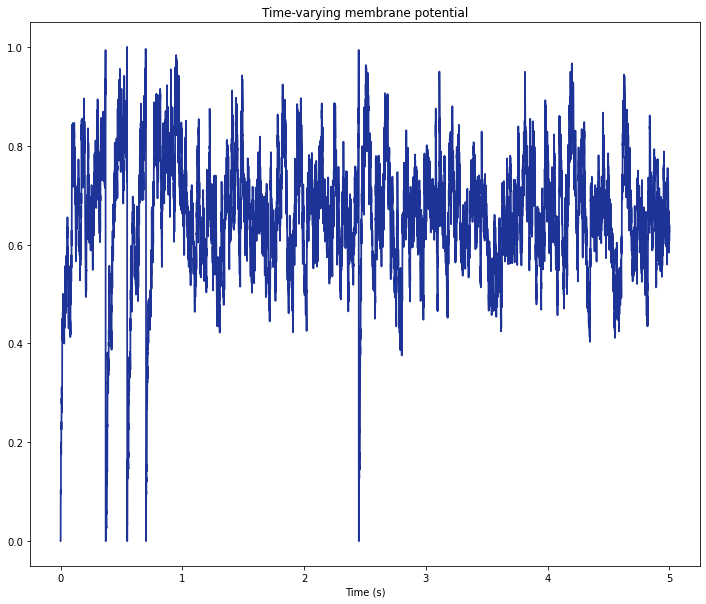

<Figure size 432x288 with 0 Axes>

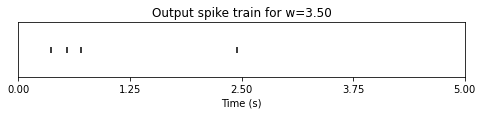

In [109]:
# PLOT 

times= np.arange(0,num_bins*delta_t,delta_t)

plt.figure(1)
fig, ax = plt.subplots(figsize=(12, 10))

plt.plot(times, m_Ps, linewidth=1.75, color = '#1E3398')
plt.title("Time-varying membrane potential")
ax.set_xlabel('Time (s)')
plt.savefig("ex4-2.png", bbox_inches = "tight")
plt.show()


plt.figure(2)
fig, ax = plt.subplots(figsize=(8, 1))

spikes = np.nonzero(out_spike_train)[0] * delta_t
y = np.ones_like(spikes) 
ax.scatter(spikes, y, marker='|', color='k')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = True, bottom = True)
plt.title("Output spike train for w=3.50")
ax.set_xticks(np.linspace(0,5, 5))
ax.set_xlabel('Time (s)')
plt.savefig("ex4-5.png", bbox_inches = "tight")
plt.show()

In [183]:
def evaluate_FanoFactor(window_size, delta_t, out_spike_train):
    
    window_bins = int(window_size/delta_t) # Window size in time bins
    window_counts = np.zeros(len(out_spike_train) - window_bins)
    
    for i in range(len(window_counts)):
        start = i
        end = i + window_bins
        window_counts[i] = np.count_nonzero(out_spike_train[start:end])
        
    mean_count = np.mean(window_counts)
    var_count = np.var(window_counts)
    fano_factor = var_count / mean_count
        
    return fano_factor
    

In [152]:
# Evaluating fano factor
window_size = 0.1 # Window size in seconds
delta_t = 0.0001 # time step in seconds (0.1 ms)
fano_factor = evaluate_FanoFactor(window_size, delta_t, out_spike_train)

## Single LIF neuron with many E and I Poisson inputs

We consider again a single LIF neuron, now receiving both excitatory input and inhibitory input from independent Poisson neurons.

In [170]:
def evaluateMembraneP_m_ei(m_Ps, t, delta_t, tau, w_e, w_i, K, input_spikes_e, input_spikes_i):
    m_p = m_Ps[t-1] + delta_t*(-(m_Ps[t-1]/tau) + (w_e)*input_spikes_e.sum(axis=0)[t-1] +(w_i)*input_spikes_i.sum(axis=0)[t-1])
    return m_p

In [197]:
# Set parameters
T = 5.0 # total time in seconds
K = 100 # independent Poisson neurons
delta_t = 0.0001 # time step in seconds (0.1 ms)
r_X = 10 # firing rate of the Poisson neuron
tau = 0.02 # membrane time constant (20 ms)
num_bins = int(T / delta_t) # number of bins in spike train
V_t = 1 # spiking threshold

np.random.seed(10)

# generate K input spike trains
in_spike_train_e = np.random.binomial(n=1, p=r_X*delta_t, size=(K, num_bins))/delta_t
in_spike_train_i = np.random.binomial(n=1, p=r_X*delta_t, size=(K, num_bins))/delta_t

In [199]:
out_spike_train = np.zeros(num_bins)
m_Ps = np.zeros(num_bins)

w = 1.8
w_e = w/np.sqrt(K)
w_i = -w/np.sqrt(K)

for t in range(1, num_bins):
    m_Ps[t] = evaluateMembraneP_m_ei(m_Ps, t, delta_t, tau, w_e, w_i, K, in_spike_train_e, in_spike_train_i)
    if m_Ps[t] > V_t:
        out_spike_train[t] = 1/delta_t
        m_Ps[t] = 0
        
print('Output Firing Rate: ', np.count_nonzero(out_spike_train)/T)

Output Firing Rate:  14.2


<Figure size 432x288 with 0 Axes>

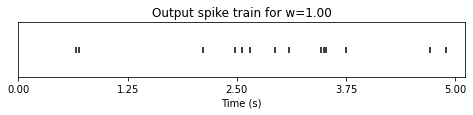

In [179]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(8, 1))

spikes = np.nonzero(out_spike_train)[0] * delta_t
y = np.ones_like(spikes) 
ax.scatter(spikes, y, marker='|', color='k')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = True, bottom = True)
plt.title("Output spike train for w=1.00")
ax.set_xticks(np.linspace(0,5, 5))
ax.set_xlabel('Time (s)')
plt.savefig("ex5-3.png", bbox_inches = "tight")
plt.show()

In [195]:
# Evaluating fano factor
window_size = 0.1 # Window size in seconds
delta_t = 0.0001 # time step in seconds (0.1 ms)
fano_factor = evaluate_FanoFactor(window_size, delta_t, out_spike_train)

In [196]:
fano_factor

0.8022149854903938

## Full network

Every single neuron in the E- and I-populations receives input from K randomly chosen E-neurons, K randomly chosen I-neurons, and K randomly chosen X-neurons.

In [36]:
def evaluateMembraneP_n_eix(N, m_Ps, i, t, delta_t, tau, w_e, w_i, w_x, C, spikes_e, spikes_i, spikes_x):
    
    h_tot = w_e*np.sum(spikes_e[t, C[i, :, 0]]) + w_i*np.sum(spikes_i[t,C[i,:,1]]) + w_x*np.sum(spikes_x[t,C[i,:,2]])
    m_p =  m_Ps[t, i] + delta_t*(-m_Ps[t, i]/tau + h_tot)
                                  
    return m_p
                                  

In [222]:

# Set parameters
T = 2.0 # total time in seconds
K = 100 # independent Poisson neurons
delta_t = 0.0001 # time step in seconds (0.1 ms)
r_X = 10 # firing rate of the Poisson neuron
tau = 0.02 # membrane time constant (20 ms)
num_bins = int(T / delta_t) # number of bins in spike train
V_t = 1 # spiking threshold
N = 1000

# Excitatory population input are Jee, Jei, Jex
# Inhibitory population input are Jii, Jie, Jix
Jee = 2
Jei = -2.5

Jii = -3
Jie = 4.4

Jex = 1
Jix = 0.2

# corresponding weights
w_ee = Jee/np.sqrt(K)
w_ei = Jei/np.sqrt(K)

w_ii = Jii/np.sqrt(K)
w_ie = Jie/np.sqrt(K)

w_ex = Jex/np.sqrt(K)
w_ix = Jix/np.sqrt(K)


# Random connections for E and I populations
C_E = np.random.randint(N, size=(N,K,3)) 
C_I = np.random.randint(N, size=(N,K,3)) 

# spike trains
spike_train_x = np.random.binomial(n=1, p=r_X*delta_t, size=(num_bins, N))/delta_t
spike_train_e = np.zeros((num_bins, N))
spike_train_i = np.zeros((num_bins, N))

# EXCITATORY POPULATION
m_Ps_e = np.zeros((num_bins, N))
        
# INHIBITORY POPULATION
m_Ps_i = np.zeros((num_bins, N))

fire_counts = np.zeros((num_bins,2)) 

for t in tqdm(range(num_bins-1)):
    for i in range(N):
        
        h_tot_e = Jee*np.sum(spike_train_e[t, C_E[i, :, 0]]) + Jei*np.sum(spike_train_i[t,C_E[i,:,1]]) + Jex*np.sum(spike_train_x[t,C_E[i,:,2]])
        m_Ps_e[t+1, i] =  m_Ps_e[t, i] + delta_t*(-m_Ps_e[t, i]/tau + h_tot_e/np.sqrt(K))
        
        h_tot_i = Jii*np.sum(spike_train_e[t, C_I[i, :, 0]]) + Jie*np.sum(spike_train_i[t,C_I[i,:,1]]) + Jix*np.sum(spike_train_x[t,C_I[i,:,2]])
        m_Ps_i[t+1, i] =  m_Ps_i[t, i] + delta_t*(-m_Ps_i[t, i]/tau + h_tot_i/np.sqrt(K))
        #m_Ps_e[t+1, i] = evaluateMembraneP_n_eix(N, m_Ps_e, i, t, delta_t, tau, w_ee, w_ei, w_ex, C_E, 
        #                                       spike_train_e, spike_train_i, spike_train_x)
        #m_Ps_i[t+1, i] = evaluateMembraneP_n_eix(N, m_Ps_i, i, t, delta_t, tau, w_ii, w_ie, w_ix, C_I, 
        #                                       spike_train_e, spike_train_i, spike_train_x)
    
    
        if m_Ps_e[t+1, i] > V_t:
            spike_train_e[t+1, i] = 1/delta_t
            m_Ps_e[t+1, i] = 0
            fire_counts[t+1, 0]+=1
        if m_Ps_i[t+1, i] > V_t:
            spike_train_i[t+1, i] = 1/delta_t
            m_Ps_i[t+1, i] = 0
            fire_counts[t+1, 1]+=1

fire_counts = fire_counts/(delta_t*N)
av_fire = np.average(fire_counts,0)
print(av_fire)

100%|█████████████████████████████████████| 19999/19999 [15:11<00:00, 21.93it/s]

[9986.108    0.   ]


In [112]:
# E and I populations are leaky integrate and fire neurons
def LIF_network(tau,J,dt,V_t,E_input,I_input,SX ,K, reset = True):
    samples = SX.shape[0]
    print(samples)
    N = SX.shape[1]
    print(N)
    V_E = np.zeros((samples,N))
    V_I = np.zeros((samples,N))
    
    SE = np.zeros((samples,N))
    SI = np.zeros((samples,N))

    sim_time = 0
    fire_counts = np.zeros((samples,2)) 
    
    for i in range(samples-1): #calculate discrete time membrane potential
        for j in range(N): 
            #E connections 
            # jth neuron in E
            
            h = J[0]*np.sum(SE[i,E_input[j,:,0]]) + J[2]*np.sum(SI[i,E_input[j,:,1]]) + J[4]*np.sum(SX[i,E_input[j,:,2]])
            V_E[i+1,j] = V_E[i,j] + dt*(-V_E[i,j]/tau + h/np.sqrt(K) )
        
            #I connections 
            # jth neuron in I
            h = J[1] * np.sum(SE[i,I_input[j,:,0]]) + J[3]*np.sum(SI[i,I_input[j,:,1]]) + J[5] * np.sum(SX[i,I_input[j,:,2]])
            V_I[i+1,j] = V_I[i,j] + dt*(-V_I[i,j]/tau + h/np.sqrt(K) )
        
            #checking to see if neurons have fired
            if V_E[i+1,j]>V_t:
                if reset ==True:
                    V_E[i+1,j]=0
                SE[i+1,j] = 1/dt
                fire_counts[i+1,0] += 1
            if V_I[i+1,j]>V_t:
                if reset ==True:
                    V_I[i+1,j]=0
                SI[i+1,j] = 1/dt
                fire_counts[i+1,1] += 1
    fire_counts = fire_counts/(dt*N)
    plt.plot(fire_counts[:,0],color = 'g')
    plt.plot(fire_counts[:,1],color = 'b')
    plt.show()
    av_fire = np.average(fire_counts,0)#
    std_fire = np.std(fire_counts,0)
    print(av_fire)
    
    print('E Av count', av_fire[0])
    print('I Av count', av_fire[1])
    print('E std count', std_fire[0])
    print('I std count', std_fire[1])
    
    
    return V_E,V_I,SE,SI

In [ ]:
#weight parameters
JEE = 2
JIE = 4.4
JEI = -2.5
JII = -3
JEX = 1
JIX = 0.2

# Set parameters
T = 2.0 # total time in seconds
delta_t = 0.0001 # time step in seconds (0.1 ms)
r_X = 10 # firing rate of the Poisson neuron
tau = 0.02 # membrane time constant (20 ms)
num_bins = int(T / delta_t) # number of bins in spike train
V_t = 1 # spiking threshold


J = [JEE,JIE,JEI,JII,JEX,JIX]

N=1000
K=100

#connectivity 
E_input = np.random.randint(N, size=(N,K,3)) # N E neurons, each with 3K inputs, E, I K
I_input = np.random.randint(N, size=(N,K,3)) # this allows self connectivity?


SX = np.random.binomial(n=1, p=r_X*delta_t, size=(num_bins,N))/delta_t


VE,VI,SE,SI = LIF_network(tau,J,delta_t,V_t,E_input,I_input,SX ,K, reset = True)

In [53]:
m_e = 0
v_e = 0
m_i = 0
v_i = 0

for i in range(1000):
    m_e += np.mean(VE[:, i])
    v_e += np.std(VE[:, i])**2
    m_i += np.mean(VI[:, i])
    v_i += np.std(VI[:, i])**2
    
print("E Average", m_e/1000)
print("E Variance", v_e/1000)
print("I Average", m_i/1000)
print("I Variance", v_i/1000)

E Average -1.2878060395800521
E Variance 1.1386181025024864
I Average -1.7921291149536953
I Variance 1.8966029092793828


<Figure size 432x288 with 0 Axes>

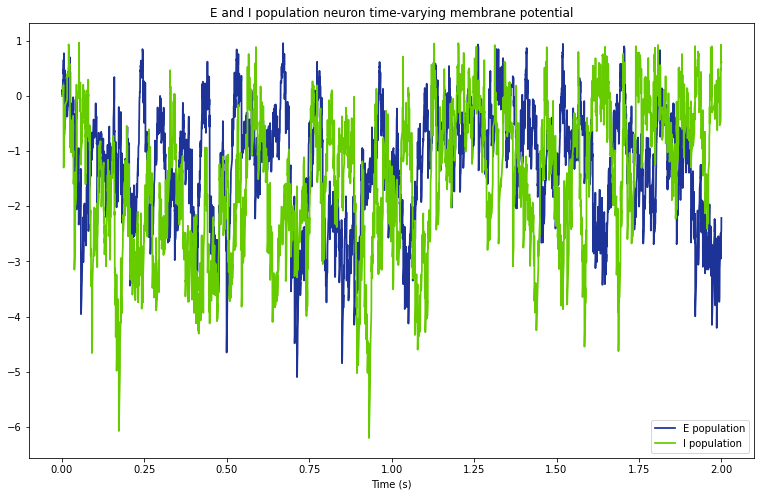

<Figure size 432x288 with 0 Axes>

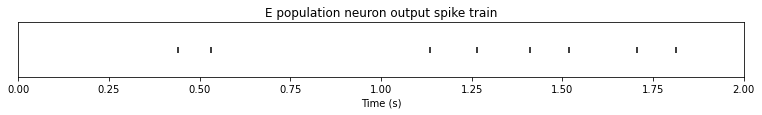

<Figure size 432x288 with 0 Axes>

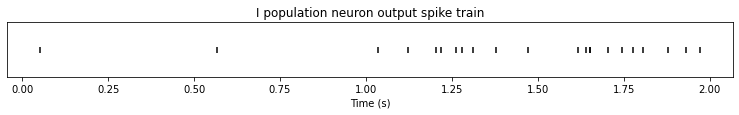

In [62]:
# PLOT 

times= np.arange(0,num_bins*delta_t,delta_t)
i_neuron = np.random.randint(1000)
e_neuron = np.random.randint(1000)

plt.figure(1)
fig, ax = plt.subplots(figsize=(13, 8))

plt.plot(times, VE[:, e_neuron], linewidth=1.75, color = '#1E3398', label = "E population")
plt.plot(times, VI[:, i_neuron], linewidth=1.75, color = '#66CC00', label = "I population")
plt.title("E and I population neuron time-varying membrane potential")
ax.set_xlabel('Time (s)')
plt.legend()
plt.savefig("ex6-EI-mp.png", bbox_inches = "tight")
plt.show()


#plt.figure(2)
#fig, ax = plt.subplots(figsize=(18, 10))

#plt.plot(times, VI[:, i_neuron], linewidth=1.75, color = '#1E3398')
#plt.title("I population neuron Time-varying membrane potential")
#ax.set_xlabel('Time (s)')
#plt.savefig("ex6-I-mp.png", bbox_inches = "tight")
#plt.show()


plt.figure(3)
fig, ax = plt.subplots(figsize=(13, 1))

spikes = np.nonzero(SE[:, e_neuron])[0] * delta_t
y = np.ones_like(spikes) 
ax.scatter(spikes, y, marker='|', color='k')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = True, bottom = True)
plt.title("E population neuron output spike train")
ax.set_xticks(np.linspace(0,2, 9))
ax.set_xlabel('Time (s)')
plt.savefig("ex6-E-os.png", bbox_inches = "tight")
plt.show()


plt.figure(4)
fig, ax = plt.subplots(figsize=(13, 1))

spikes = np.nonzero(SI[:, i_neuron])[0] * delta_t
y = np.ones_like(spikes) 
ax.scatter(spikes, y, marker='|', color='k')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = True, bottom = True)
plt.title("I population neuron output spike train")
ax.set_xticks(np.linspace(0,2, 9))
ax.set_xlabel('Time (s)')
plt.savefig("ex6-I-os.png", bbox_inches = "tight")
plt.show()

<Figure size 432x288 with 0 Axes>

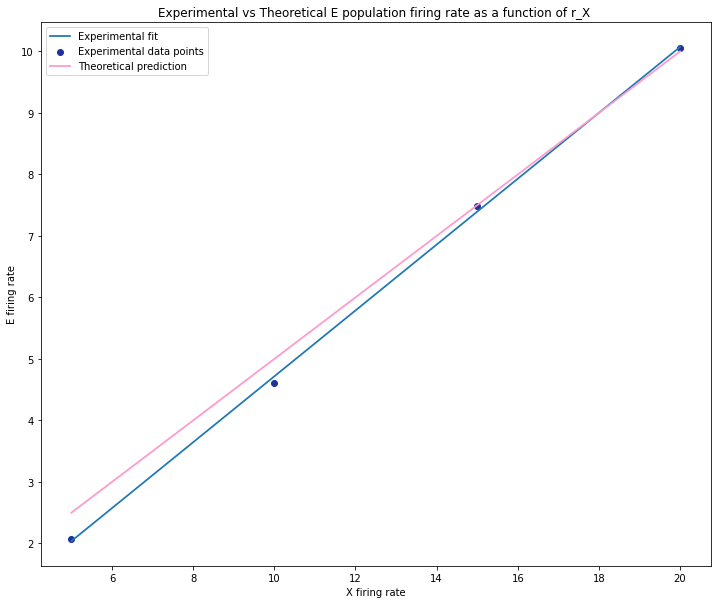

<Figure size 432x288 with 0 Axes>

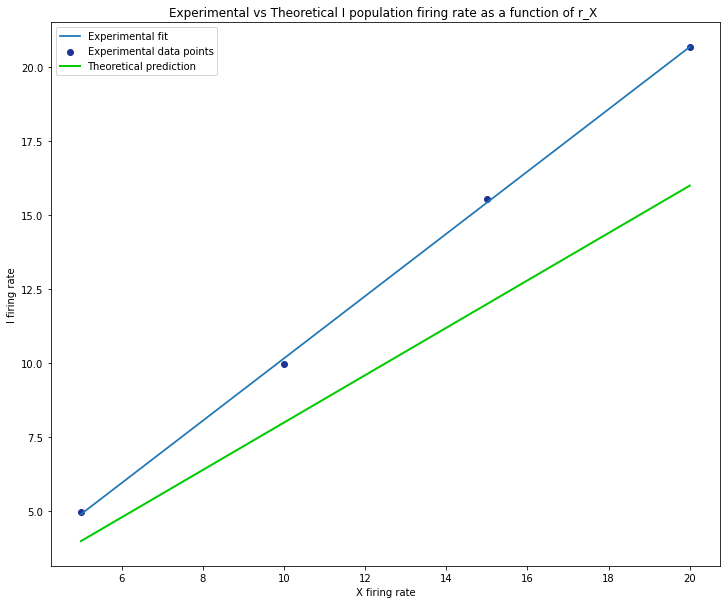

In [34]:
# PLOTS 
r_x = np.linspace(5, 20, 15)
r_e = r_x/2
r_i = r_x * 4 / 5

y_e = [2.0765, 4.6135, 7.4845, 10.0475]
y_i = [4.9965, 9.9795, 15.533, 20.674]


x = [5, 10, 15, 20]



plt.figure(1)
fig, ax = plt.subplots(figsize=(12, 10))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y_e, 1))(np.unique(x)),linewidth=1.75, label = "Experimental fit")
plt.scatter(x, y_e, color = "#1E3398", label ="Experimental data points")
plt.plot(r_x, r_e, linewidth=1.75, label = "Theoretical prediction", color = "#FF99CC")

plt.title("Experimental vs Theoretical E population firing rate as a function of r_X ")
plt.legend()
ax.set_xlabel('X firing rate')
ax.set_ylabel('E firing rate')
plt.savefig("ex6-E-lines.png", bbox_inches = "tight")
plt.show()

plt.figure(2)
fig, ax = plt.subplots(figsize=(12, 10))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y_i, 1))(np.unique(x)),linewidth=1.75, label = "Experimental fit")
plt.scatter(x, y_i, color = "#1E3398", label ="Experimental data points")
plt.plot(r_x, r_i, linewidth=2, label = "Theoretical prediction", color = "#00CC00")

plt.title("Experimental vs Theoretical I population firing rate as a function of r_X ")
plt.legend()
ax.set_xlabel('X firing rate')
ax.set_ylabel('I firing rate')
plt.savefig("ex6-I-lines.png", bbox_inches = "tight")
plt.show()
